In [17]:
from bs4 import BeautifulSoup  #크롤링
import requests
from konlpy.tag import Twitter  #형태소분석

In [18]:
search_word = "북한"  # 검색어 지정
title_list = []

In [19]:
def get_titles(start_num, end_num,s_date, e_date):  #페이지 지정
    while 1:
        if start_num > end_num:
            break

        url = "https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}&sm=tab_opt&pd=3&ds={}&de={}".format(search_word,start_num,s_date,e_date)
        req = requests.get(url)
 
        # 정상적인 request 확인
        if req.ok:
            html = req.text
            soup = BeautifulSoup(html, 'html.parser')
 
            # 뉴스제목 뽑아오기
            titles = soup.select(
                'ul.type01 > li > dl > dt > a'
            )
 
            # list에 넣어준다
            for title in titles:
                title_list.append(title['title'])
        start_num += 10

In [20]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [21]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'),
 ('NanumGothicCoding',
  '/usr/share/fonts/truetype/nanum/NanumGothic_Coding_Bold.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'),
 ('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'),
 ('NanumGothicCoding',
  '/usr/share/fonts/truetype/nanum/NanumGothic_Coding.ttf')]

In [22]:
plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

In [23]:
def graph():
    twitter = Twitter()
 
    sentences_tag = []
    noun_adj_list = []

    #형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
 
 
    #명사와 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)

    #100이상인 단어 추출
    counts = Counter(noun_adj_list)
    counts_df=pd.DataFrame.from_dict(counts,orient='index').reset_index()
    counts_df=counts_df.rename(columns={'index':'word',0:'num'})
    counts_true=counts_df[counts_df.word!='북한']
    #counts_true=counts_true[counts_true.word!='남북']
    counts_100=counts_true[counts_true.num>80]
    print(counts_100)

        
    #파이차트그리기
    plt.pie(counts_100.num,
           labels=counts_100.word,
           shadow=True,
           textprops={'fontsize':14})
    plt.axis('equal')
    plt.title('Pie Chart of news',fontsize=20)
    fig=plt.gcf()
    plt.show()
    fig.savefig('2019pie.png')


       word  num
0       말레이  151
51       도발   97
67       유엔   86
98      미사일  263
164      발사  380
200   탄도미사일   83
206      대사   87
237      미국   85
274     트럼프   90
508       발   99
1161    발사체  151


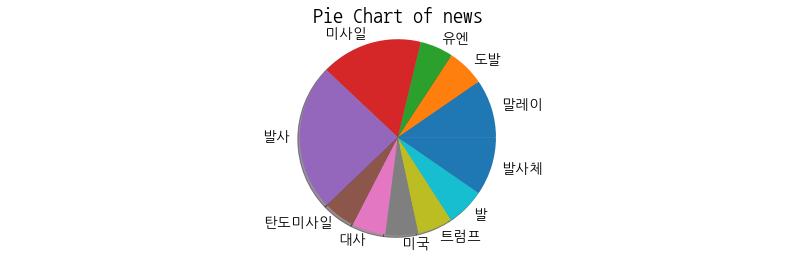

In [25]:
if __name__ == '__main__':
    #1~200번게시글 까지 크롤링
    get_titles(1,1000,'2017.05.10','2019.11.30')
    #막대그래프
    graph()